In [1]:
from tesspy.tessellation import Tessellation
from tesspy.poi_data import RoadData, POIdata
import matplotlib.pyplot as plt
import contextily as ctx


import warnings
warnings.filterwarnings('ignore')

In [17]:
city = Tessellation('Denpasar, Indonesia')

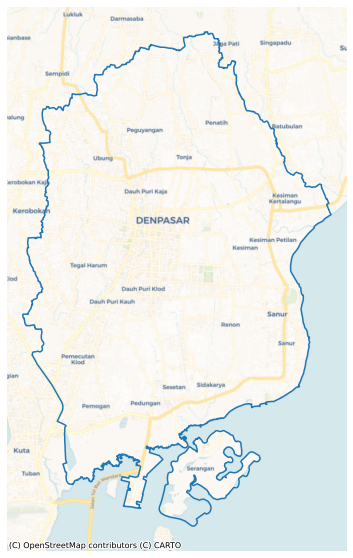

In [18]:
city_polygon = city.get_polygon()

ax = city_polygon.boundary.plot(figsize=(10,10))
ctx.add_basemap(ax=ax, crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()

# Data Collection

In [19]:
city_POI = POIdata(city_polygon, ["amenity", "building"], 60, False).get_poi_data()

# only collecting buildung data
city_building = POIdata(city_polygon, ["building"], 60, False).get_poi_data()

city_road = RoadData(city_polygon, 
                     detail_deg=None, 
                     split_roads=True,
                     verbose=True).get_road_network()

Creating custom filter for all highway types
Created custom filter is ['highway'~'motorway|trunk|primary|secondary|tertiary|residential|unclassified|motorway_link|trunk_link|primary_link|secondary_link|living_street|pedestrian|track|bus_guideway|footway|path|service|cycleway']
Collection street network data
Splitting the linestring, such that each linestring has exactly 2 points.
Collected data has 123748 street segments


# Tessellations

## Squares and Hexagons

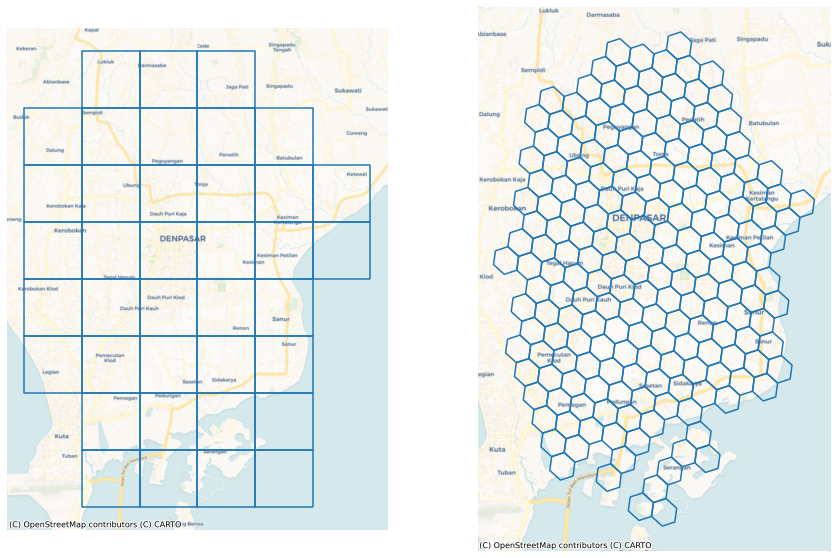

In [21]:
#user input is the resolution
city_sq = city.squares(14)

city_hex = city.hexagons(8)

fig,axes = plt.subplots(1,2, figsize=(15,10))

city_sq.boundary.plot(ax=axes[0])
ctx.add_basemap(ax=axes[0], crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager)
axes[0].set_axis_off()

city_hex.boundary.plot(ax=axes[1])
ctx.add_basemap(ax=axes[1], crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager)
axes[1].set_axis_off()

## Adaptive Squares

In [22]:
# Adaptive Squares using only building data
city_asq = city.adaptive_squares(start_resolution=14, 
                                 poi_categories=["building"], 
                                 threshold=None, 
                                 timeout=60, 
                                 verbose=False)

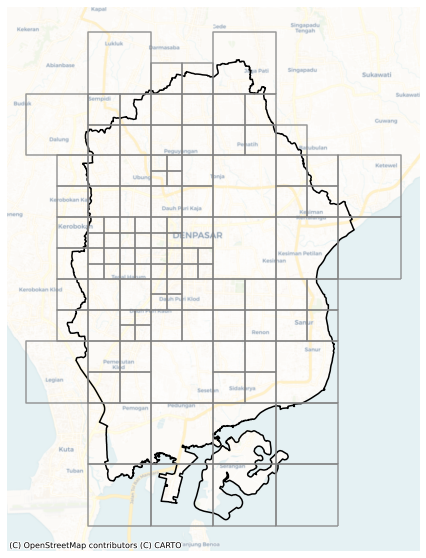

In [27]:
ax = city_polygon.boundary.plot(color='black', figsize=(8,10))
city_asq.boundary.plot(ax=ax, color="grey", alpha=0.8)
ctx.add_basemap(ax=ax, crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager, alpha=0.6)
ax.set_axis_off()

In [24]:
# Adaptive Squares using only building data
city_asq_2 = city.adaptive_squares(start_resolution=14, 
                                 poi_categories=["amenity","building"], 
                                 threshold=None, 
                                 timeout=60, 
                                 verbose=False)

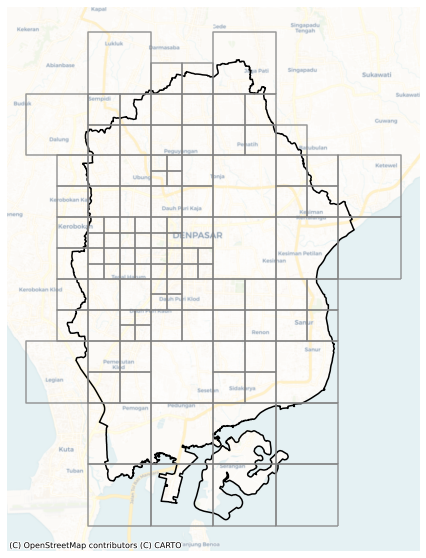

In [26]:
ax = city_polygon.boundary.plot(color='black', figsize=(8,10))
city_asq_2.boundary.plot(ax=ax, color="grey", alpha=0.8)
ctx.add_basemap(ax=ax, crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager, alpha=0.6)
ax.set_axis_off()

## Voronoi Polygons

In [34]:
city_kmeans = city.voronoi(cluster_algo="k-means",
                          poi_categories=["amenity", "building"],
                          timeout=60,
                          n_polygons=500,
                          verbose=False)

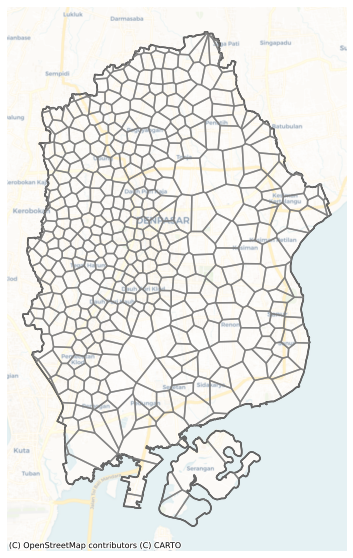

In [35]:
ax = city_polygon.boundary.plot(color='black', figsize=(8,10))
city_kmeans.boundary.plot(ax=ax, color="grey", alpha=0.8)
ctx.add_basemap(ax=ax, crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager, alpha=0.6)
ax.set_axis_off()

In [36]:
city_hdbscan = city.voronoi(cluster_algo="hdbscan",
                          poi_categories=["amenity", "building"],
                          timeout=60,
                          min_cluster_size=15,
                          verbose=False)

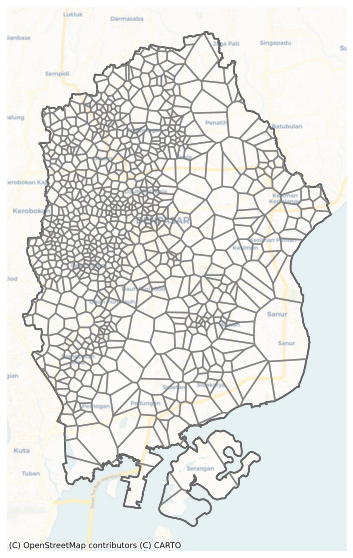

In [37]:
ax = city_polygon.boundary.plot(color='black', figsize=(8,10))
city_hdbscan.boundary.plot(ax=ax, color="grey", alpha=0.8)
ctx.add_basemap(ax=ax, crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager, alpha=0.6)
ax.set_axis_off()

## City Blocks

In [ ]:
city_cb = city.city_blocks(number_of_LGUs=1000,
                          detail_deg=None,
                          split_roads=True,
                          verbose=True)

Creating custom filter for all highway types
Created custom filter is ['highway'~'motorway|trunk|primary|secondary|tertiary|residential|unclassified|motorway_link|trunk_link|primary_link|secondary_link|living_street|pedestrian|track|bus_guideway|footway|path|service|cycleway']
Collection street network data
Splitting the linestring, such that each linestring has exactly 2 points.


In [ ]:
ax = city_polygon.boundary.plot(color='black', figsize=(8,10))
city_cb.boundary.plot(ax=ax, color="grey", alpha=0.8)
ctx.add_basemap(ax=ax, crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()